In [197]:
# From https://archive.ics.uci.edu/ml/datasets/DrivFace#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('drivPoints.txt')
df.head(3)

,fileName,subject,imgNum,label,ang,xF,yF,wF,hF,xRE,yRE,xLE,yLE,xN,yN,xRM,yRM,xLM,yLM
0,20130529_01_Driv_001_f,1,1,2,0,292,209,100,112,323,232,367,231,353,254,332,278,361,278
1,20130529_01_Driv_002_f,1,2,2,0,286,200,109,128,324,235,366,235,353,258,333,281,361,281
2,20130529_01_Driv_003_f,1,3,2,0,290,204,105,121,325,240,367,239,351,260,334,282,362,282


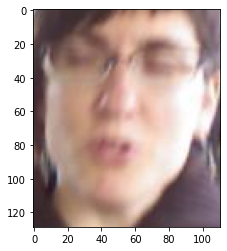

In [3]:
img_data = df.iloc[25]
img = plt.imread('DrivImages/'+ img_data.fileName + '.jpg')
plt.imshow(img[img_data.yF : img_data.yF+img_data.hF, img_data.xF : img_data.xF+img_data.wF]);

In [4]:
def generate_u0(c,n):
    u0= []
    for i in range(c):
        u0.append([])
        for j in range(n):
            if i==j or i==j%c:
                u0[i].append(1)
            else:
                u0[i].append(0)
    return u0

In [5]:
def generate_vt(u, x, c, n, p, m):
    v=[]
    for i in range(c):
        v.append([])
        for j in range(p):
            v_ij=sum((u[i][k]**m)*x[k][j] for k in range(n))/sum(u[i][k]**m for k in range(n))
            v[i].append(v_ij)
    return v

In [6]:
def calculate_d(x,v, c, n):
    d=[]
    for i in range(c):
        d.append([])
        for k in range(n):           
            d[i].append(np.linalg.norm(abs(np.subtract(x[k],v[i]))))
    return d

In [7]:
def generate_u(d, m, c, n):
    d_eps = 1e-6
    u=[]
    for i in range(c):
        u.append([])
        for k in range(n):
            u_sum=0
            different=False
            for s in range(c):
                if d[s][k]==0:
                    d[s][k] += d_eps
                #     different=True
                #     break
                u_sum+=(d[i][k]/d[s][k])**(2/(m-1))
            if not different:
                u[i].append(1/u_sum)                  
    return u

In [8]:
def delta_u(u1, u2, c, n):
    return sum(sum(np.linalg.norm(np.subtract(u2[i][k], u1[i][k])) for k in range(n)) for i in range(c))

In [46]:
X = df[['xF','yF','wF','hF', 'xRE', 'yRE', 'xLE', 'yLE', 'xN', 'yN', 'xRM', 'yRM', 'xLM', 'yLM']].values
# X = df[['xRE', 'yRE', 'xLE', 'yLE', 'xN', 'yN', 'xRM', 'yRM', 'xLM', 'yLM']].values

In [47]:
p=X.shape[1]
n=X.shape[0]
c=3
m=2
epsilon = 1e-5
d_u = 2*epsilon
u_old=generate_u0(c,n)
print(p,n)

14 606


In [48]:
while epsilon<d_u:
    v = generate_vt(u_old,X,c,n,p,m)
    d = calculate_d(X,v,c,n)
    u_new = generate_u(d, m, c, n)
    d_u = delta_u(u_old, u_new, c, n)
    u_old = u_new
    print(d_u)

807.9905507944912
7.564678683909661
18.69972316250808
46.016837181272706
103.60907330119824
159.00741219871136
136.1470018749603
171.62010495203947
100.93638397695376
24.595877653213996
9.50734287505712
4.435603425812131
2.1340430808028272
1.0355117718687281
0.5042962867107613
0.24597616393786803
0.12006230659757003
0.05861950074350526
0.0286234966176131
0.013977071339560339
0.00682512800836554
0.003332750916016324
0.0016273906656851297
0.00079465419922689
0.00038802760986716457
0.000189472313583701
9.251837834518535e-05
4.5176203231642956e-05
2.2059266588459045e-05
1.0771400968288651e-05
5.259602118599959e-06


In [49]:
unique, counts = np.unique(np.array(u_new).argmax(axis=0), return_counts=True)
np.asarray((unique, counts)).T

array([[  0, 233],
       [  1, 168],
       [  2, 205]])

In [50]:
unique, counts = np.unique(df.label.values-1, return_counts=True)
np.asarray((unique, counts)).T

array([[  0,  27],
       [  1, 546],
       [  2,  33]])